In [5]:
cd /Users/praneithranganath/Documents/GitHub/Brain-Tumor-Classification/

/Users/praneithranganath/Documents/GitHub/Brain-Tumor-Classification


In [15]:
import cv2
import pickle
import os
import glob
from logger import setup_logging
import numpy as np
from scipy.stats import pearsonr
from google.cloud import storage

# Replace with your GCS bucket name
BUCKET_NAME = "data-source-brain-tumor-classification"
HISTOGRAMS_FILE = 'validation/histograms.pkl'
keyfile_path = './keys/tensile-topic-424308-d9-7418db5a1c90.json' 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = keyfile_path

def upload_to_gcs(bucket_name, destination_blob_name, source_file_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(f"File {source_file_name} uploaded to {destination_blob_name}.")

def download_from_gcs(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print(f"Blob {source_blob_name} downloaded to {destination_file_name}.")

def capture_histograms():
    #logger = setup_logging()
    #logger.info("Started method: capture_histograms")

    base_dir = './data/Training/'
    classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
    
    histograms = []

    for cls in classes:
        folder_path = os.path.join(base_dir, cls)
        image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
        
        if image_paths:
            first_image_path = image_paths[0]
            try:
                first_image = cv2.imread(first_image_path)
                gray_first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
                hist_first_image = cv2.calcHist([gray_first_image], [0], None, [256], [0, 256])

                valid_histograms = [hist_first_image]

                for image_path in image_paths[1:]:
                    try:
                        load_image = cv2.imread(image_path)
                        gray_image = cv2.cvtColor(load_image, cv2.COLOR_BGR2GRAY)
                        hist_image = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

                        correlation = pearsonr(hist_first_image.flatten(), hist_image.flatten())[0]

                        if correlation > 0.7:
                            valid_histograms.append(hist_image)

                    except Exception as e:
                        #logger.info(f"Error processing image {image_path}: {e}")

                histograms.extend(valid_histograms)
                #logger.info(f"Captured {len(valid_histograms)} histograms for class {cls}")

            except Exception as e:
                print("hihi")
                #logger.info(f"Error processing images in folder {folder_path}: {e}")
        else:
            #logger.info(f"No images found in directory: {folder_path}")
            return False
    
    #logger.info("Finished capturing histograms")

    try:
        local_histogram_path = './src/histograms.pkl'
        with open(local_histogram_path, 'wb') as f:
            pickle.dump(histograms, f)
        #logger.info("Histogram data saved locally to histograms.pkl")

        upload_to_gcs(BUCKET_NAME, HISTOGRAMS_FILE, local_histogram_path)
        #logger.info("Histogram data uploaded to GCS")

    except Exception as e:
        #logger.info(f"Error saving histogram data: {e}")
        return False
    
    #logger.info("Finished method: capture_histograms")
    return True

def validate_image(image):
    logger = setup_logging()
    logger.info("Started method: validate_image")

    local_histogram_path = './src/histograms.pkl'

    try:
        download_from_gcs(BUCKET_NAME, HISTOGRAMS_FILE, local_histogram_path)
        with open(local_histogram_path, 'rb') as f:
            histograms = pickle.load(f)
        logger.info("Loaded histograms from histograms.pkl")
    except Exception as e:
        logger.exception(f"Failed to load histograms: {e}")
        return False
    
    load_image = cv2.imread(image)
    gray_image = cv2.cvtColor(load_image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    for hist in histograms:
        correlation = cv2.compareHist(histogram, hist, cv2.HISTCMP_CORREL)
        logger.info(f"Image {image} has a reference histogram with correlation: {correlation:.4f}")
        if correlation > 0.7:
            return True

    logger.info("Finished method: validate_image")   
    return False



IndentationError: expected an indented block after 'except' statement on line 69 (1626121443.py, line 72)

In [12]:
capture_histograms()

False

In [8]:
pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
capture_histograms()

Captured 953 histograms for class glioma
Captured 899 histograms for class meningioma
Captured 10 histograms for class notumor
Captured 355 histograms for class pituitary
Finished capturing histograms
Histogram data saved successfully to histograms.pkl
Finished method: capture_histograms


True

In [9]:
import os
import glob
import cv2
import pickle
import numpy as np
from scipy.stats import pearsonr

def capture_histograms():

    base_dir = './data/Training/'
    classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
    
    histograms = []

    for cls in classes:
        folder_path = os.path.join(base_dir, cls)
        image_paths = glob.glob(os.path.join(folder_path, '*.jpg'))
        
        if image_paths:
            first_image_path = image_paths[0]
            try:
                first_image = cv2.imread(first_image_path)
                gray_first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
                hist_first_image = cv2.calcHist([gray_first_image], [0], None, [256], [0, 256])

                valid_histograms = [hist_first_image]

                for image_path in image_paths[1:]:
                    try:
                        load_image = cv2.imread(image_path)
                        gray_image = cv2.cvtColor(load_image, cv2.COLOR_BGR2GRAY)
                        hist_image = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

                        correlation = pearsonr(hist_first_image.flatten(), hist_image.flatten())[0]

                        if correlation > 0.7:
                            valid_histograms.append(hist_image)

                    except Exception as e:
                        print(f"Error processing image {image_path}: {e}")

                histograms.extend(valid_histograms)
                print(f"Captured {len(valid_histograms)} histograms for class {cls}")

            except Exception as e:
                print(f"Error processing images in folder {folder_path}: {e}")
        else:
            print(f"No images found in directory: {folder_path}")
            return False
    
    print("Finished capturing histograms")

    try:
        with open('./src/histograms.pkl', 'wb') as f:
            pickle.dump(histograms, f)
        print("Histogram data saved successfully to histograms.pkl")
    except Exception as e:
        print(f"Error saving histogram data: {e}")
        return False
    
    print("Finished method: capture_histograms")
    return True


In [5]:
import mlflow.types
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import mlflow.types.schema as schema
from mlflow.types.schema import Schema, ColSpec
import os
import mlflow
import numpy as np


keyfile_path = '/Users/praneithranganath/Documents/M2U/tensile-topic-424308-d9-17a256b9b21c.json'  # change as per your keyfile path

# Checking if file exists
if not os.path.exists(keyfile_path):
    raise FileNotFoundError(f"The file '{keyfile_path}' does not exist. Please check the path.")
else:
    print(f'Path found : {keyfile_path}')

# Set the environment variable to point to the service account key file
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = keyfile_path
os.environ['MLFLOW_GCS_BUCKET'] = 'ml-flow-remote-tracker-bucket'

mlflow.set_tracking_uri("http://35.231.231.140:5000/")
mlflow.set_experiment("Brain-Tumor-Classification")

# Enable TensorFlow with Metal on macOS
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("TensorFlow with Metal enabled.")
    except RuntimeError as e:
        print(e)

# # Configure TensorFlow to use all available CPU cores
# num_cores = len(tf.config.experimental.list_physical_devices('CPU'))
# print(f'Number of available CPU cores: {num_cores}')
# tf.config.threading.set_inter_op_parallelism_threads(3)
# tf.config.threading.set_intra_op_parallelism_threads(3)

def preprocessing_for_training():
    path = 'data/Training/'
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        seed=42
    )
    return train_generator

def preprocessing_for_testing_inference(batchSize):
    path = 'data/Testing/'
    test_val_datagen = ImageDataGenerator(rescale=1.0/255)
    test_generator = test_val_datagen.flow_from_directory(
        path,
        target_size=(224, 224),
        batch_size=batchSize,
        class_mode='categorical',
        shuffle=False
    )
    return test_generator

def build_model(hp):
    with mlflow.start_run(nested=True): 
        model = Sequential()
        model.add(tf.keras.layers.Input(shape=(224, 224, 3)))  # Correctly initialize the input shape

        for i in range(1, 3):
            filters = hp.Int(f'conv_{i}_filters', min_value=32, max_value=256, step=32)
            model.add(Conv2D(
                filters=filters,
                kernel_size=(3, 3),
                activation='relu',
                padding='same'
            ))
            mlflow.log_param(f'conv_{i}_filters', filters)
            model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())

        num_dense_layers = hp.Int('num_dense_layers', 1, 3)
        mlflow.log_param('num_dense_layers', num_dense_layers)

        for i in range(num_dense_layers):
            units = hp.Int(f'dense_{i}_units', min_value=128, max_value=512, step=128)
            model.add(Dense(units=units, activation='relu'))
            mlflow.log_param(f'dense_{i}_units', units)
            if hp.Boolean(f'dropout_{i}'):
                dropout_rate = hp.Float(f'dropout_{i}_rate', min_value=0.2, max_value=0.5, step=0.1)
                model.add(Dropout(rate=dropout_rate))
                mlflow.log_param(f'dropout_{i}_rate', dropout_rate)

        model.add(Dense(4, activation='softmax'))

        learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        mlflow.log_param('learning_rate', learning_rate)

        return model

def ready_model():
    num_classes = 4
    img_shape = (224, 224, 3)

    with mlflow.start_run():
        
        # Create the model
        model = Sequential([
            Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=img_shape),
            MaxPooling2D(pool_size=(2, 2)),

            Conv2D(64, (3, 3), activation="relu", padding="same"),
            MaxPooling2D(pool_size=(2, 2)),

            Conv2D(128, (3, 3), activation="relu", padding="same"),
            MaxPooling2D(pool_size=(2, 2)),

            Conv2D(128, (3, 3), activation="relu", padding="same"),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),

            Dense(512, activation="relu"),
            Dense(num_classes, activation="softmax")
        ])

        # Log the model summary
        model.summary(print_fn=lambda x: mlflow.log_text(x, "model_summary.txt"))

        # Log the model configuration
        mlflow.log_param("model_type", "Sequential")
        mlflow.log_param("num_classes", num_classes)
        mlflow.log_param("img_shape", img_shape)

        optimizer = Adam(learning_rate=0.001, beta_1=0.85, beta_2=0.9925)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', 'recall'])

        # Log the optimizer configuration
        mlflow.log_param("optimizer", "Adam")
        mlflow.log_param("learning_rate", 0.001)
        mlflow.log_param("beta_1", 0.85)
        mlflow.log_param("beta_2", 0.9925)

        # Prepare data generators
        train_generator = preprocessing_for_training()
        validation_generator = preprocessing_for_testing_inference(32)

        # Log the number of training and validation samples
        mlflow.log_param("num_train_samples", train_generator.samples)
        mlflow.log_param("num_val_samples", validation_generator.samples)

        # Train the model
        history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

        input_example = tf.random.uniform(shape=(1, *img_shape)).numpy()
        output_example = model.predict(input_example)
        
        # Manually define the input and output schemas
        # input_schema = Schema([
        #     ColSpec(dtype="float32", shape=img_shape)
        # ])

        # output_schema = Schema([
        #     ColSpec(dtype="float32", shape=(num_classes,))
        # ])

        # input_schema = Schema([ColSpec(name=str(i), type="float") for i in range(img_shape[0])])
        # output_schema = Schema([ColSpec(name=str(i), type="float") for i in range(num_classes)])

        #input_schema = schema.TensorSpec(shape=img_shape, type=np.dtype("float32"))
        #output_schema = schema.TensorSpec(shape=(None, num_classes), type=np.dtype("float32"))

        # input_schema = schema.Schema([schema.ColSpec(type=np.float32, shape=img_shape)])
        # output_schema = schema.Schema([schema.ColSpec(type=np.float32, shape=(num_classes,))])

        #signature = mlflow.models.signature.ModelSignature(inputs=input_schema, outputs=output_schema)
        # signature = mlflow.models.signature.ModelSignature(
        #     inputs=mlflow.models.signature.infer_signature(input_schema),
        #     outputs=mlflow.models.signature.infer_signature(output_schema)
        # )
        # Option 1: Manually construct the signature object


        # Option 2: Infer the signature
        signature =  mlflow.models.signature.infer_signature(input_example, output_example)

        mlflow.keras.log_model(
            model,
            artifact_path="Brain_Tumor_Classification_Model",
            #input_example=input_example.numpy().tolist()
            signature=signature
        )

        # Log the training metrics
        for epoch in range(10):
            mlflow.log_metric("train_accuracy", history.history['accuracy'][epoch], step=epoch)
            mlflow.log_metric("train_recall", history.history['recall'][epoch], step=epoch)
            mlflow.log_metric("val_accuracy", history.history['val_accuracy'][epoch], step=epoch)
            mlflow.log_metric("val_recall", history.history['val_recall'][epoch], step=epoch)


        return model

# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     factor=3
#     # directory='./model_runs/',
#     # project_name='brain_tumor_classification'
# )

# with mlflow.start_run():
#     mlflow.keras.autolog()
#     tuner.search(preprocessing_for_training(), epochs=50, validation_data=preprocessing_for_testing_inference(32))

# # Get the optimal hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The optimal hyperparameters are as follows:
# Number of filters in each convolutional layer:
#     Conv_1_filters: {best_hps.get('conv_1_filters')}
#     Conv_2_filters: {best_hps.get('conv_2_filters')}
# Number of dense layers: {best_hps.get('num_dense_layers')}
# """)
# for i in range(best_hps.get('num_dense_layers')):
#     print(f"Dense_{i}_units: {best_hps.get(f'dense_{i}_units')}")
#     print(f"Dropout_{i}_rate: {best_hps.get(f'dropout_{i}_rate')}")
# print(f"Learning rate: {best_hps.get('learning_rate')}")

# Build the model with the optimal hyperparameters and train it
# model = tuner.hypermodel.build(best_hps)
# history = model.fit(preprocessing_for_training(), epochs=50, validation_data=preprocessing_for_testing_inference(32))


Path found : /Users/praneithranganath/Documents/M2U/tensile-topic-424308-d9-17a256b9b21c.json
TensorFlow with Metal enabled.


In [6]:
model = ready_model()

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Epoch 1/10


2024-06-19 03:14:13.550726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5159 - loss: 1.0680 - recall: 0.3164

KeyboardInterrupt: 

In [8]:

import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

Notebook running: keras  3.3.3


In [4]:
from tensorflow.keras.preprocessing import image
def preprocessing_for_(path_, batchSize):
    test_val_datagen = ImageDataGenerator(rescale=1.0/255)
    test_generator = test_val_datagen.flow(
    path_,
    batch_size= batchSize,
    shuffle=False
)
    return test_generator

def load_and_preprocess_image(file_path, img_size=(224, 224, 3)):
    img = image.load_img(file_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, 0)  # Create a batch
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

In [1]:
import mlflow
import os
keyfile_path = '/Users/praneithranganath/Documents/M2U/tensile-topic-424308-d9-17a256b9b21c.json'  # change as per your keyfile path

# Checking if file exists
if not os.path.exists(keyfile_path):
    raise FileNotFoundError(f"The file '{keyfile_path}' does not exist. Please check the path.")
else:
    print(f'Path found : {keyfile_path}')

# Set the environment variable to point to the service account key file
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = keyfile_path
os.environ['MLFLOW_GCS_BUCKET'] = 'ml-flow-remote-tracker-bucket'

mlflow.set_tracking_uri("http://35.231.231.140:5000/")
mlflow.set_experiment("Brain-Tumor-Classification")

logged_model = 'runs:/c5c9b41a3163479e9e1fd4a6a8384e31/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

Path found : /Users/praneithranganath/Documents/M2U/tensile-topic-424308-d9-17a256b9b21c.json


2024-06-20 23:50:44.860817: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-20 23:50:44.860848: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-20 23:50:44.860854: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-20 23:50:44.861404: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-20 23:50:44.861418: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
Xi = load_and_preprocess_image('data/Testing/glioma/Te-gl_0010.jpg')
preds = loaded_model.predict(Xi)
preds.argsort()[0, -5:][::-1][0] #Top class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


2024-06-19 02:42:29.327436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


0

In [82]:
from lime.lime_image import LimeImageExplainer

In [83]:
explainer = LimeImageExplainer()

In [84]:
explanation = explainer.explain_instance(Xi[0], model.predict, 
                                         top_labels=4, num_samples=250,
                                         random_seed=42)

  0%|          | 0/250 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


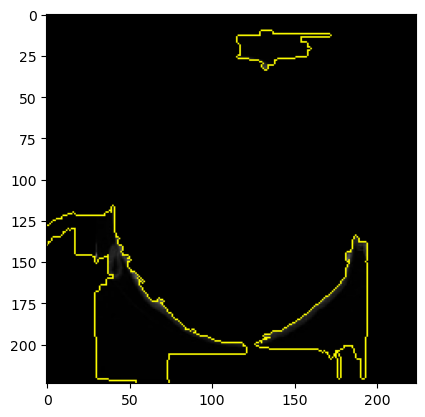

In [87]:
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt
temp, mask = explanation.get_image_and_mask(preds.argsort()[0, -5:][::-1][0], positive_only=True, num_features=5, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2, mask))

In [89]:
Xi_ = np.squeeze(Xi)

In [90]:
superpixels = skimage.segmentation.quickshift(Xi_, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

78

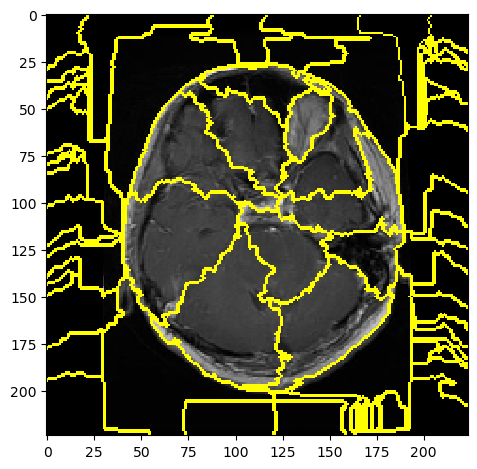

In [91]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi_, superpixels))

In [92]:
num_perturb = 100
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations#Show example of perturbatio

array([[1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 1, ..., 1, 1, 0]])

In [93]:
def perturb_image(img,perturbation,segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


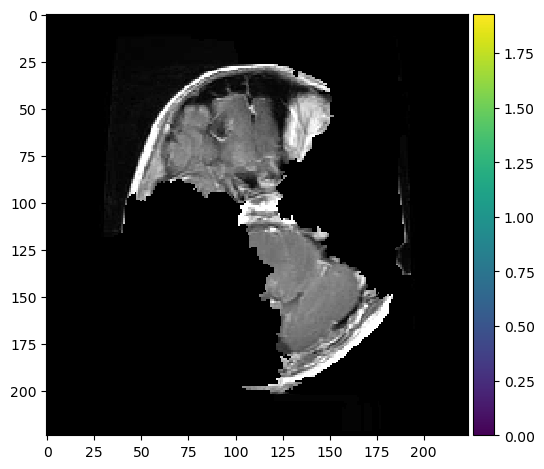

In [94]:
skimage.io.imshow(perturb_image(Xi_/0.5,perturbations[4],superpixels))

In [95]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = model.predict(perturbed_img)
  predictions.append(pred)

predictions = np.array(predictions)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━

array([[[2.18061404e-03, 3.17428756e-04, 9.97497618e-01, 4.29108104e-06]],

       [[9.15289507e-04, 3.39817620e-06, 9.99081254e-01, 7.71910530e-13]],

       [[4.15926886e-04, 1.46038046e-05, 9.99569356e-01, 2.83731882e-09]],

       [[6.11646706e-03, 1.86251593e-04, 9.93697345e-01, 1.27536284e-08]],

       [[3.93875951e-07, 3.62249602e-06, 9.99996066e-01, 1.44021284e-09]],

       [[4.26134095e-02, 8.28916114e-03, 9.49074209e-01, 2.31899321e-05]],

       [[2.46865470e-02, 7.36521441e-04, 9.74574268e-01, 2.76947230e-06]],

       [[2.72829719e-02, 1.84130995e-03, 9.70875263e-01, 4.07483412e-07]],

       [[3.57462279e-03, 7.49646162e-04, 9.95675743e-01, 5.57238167e-08]],

       [[1.20767288e-01, 6.22688895e-05, 8.79153013e-01, 1.75307487e-05]],

       [[7.44344085e-04, 2.38284143e-03, 9.96871769e-01, 1.00987552e-06]],

       [[1.28986165e-01, 1.52525085e-03, 8.68626475e-01, 8.62203189e-04]],

       [[4.82729562e-02, 3.60645536e-05, 9.51690972e-01, 3.36449943e-08]],

       [[4.5

In [97]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
print(top_pred_classes[0])
class_to_explain = top_pred_classes[0]
print(predictions[:,:,class_to_explain])

0
[[2.18061404e-03]
 [9.15289507e-04]
 [4.15926886e-04]
 [6.11646706e-03]
 [3.93875951e-07]
 [4.26134095e-02]
 [2.46865470e-02]
 [2.72829719e-02]
 [3.57462279e-03]
 [1.20767288e-01]
 [7.44344085e-04]
 [1.28986165e-01]
 [4.82729562e-02]
 [4.52801228e-01]
 [5.91052592e-01]
 [4.11308691e-04]
 [2.86701870e-05]
 [9.42132592e-01]
 [1.65088553e-04]
 [5.85404873e-01]
 [9.35866501e-06]
 [1.47116929e-02]
 [3.56142737e-05]
 [2.20861868e-03]
 [1.26494924e-04]
 [7.85687065e-04]
 [8.55190493e-03]
 [5.96326828e-08]
 [2.43845061e-05]
 [1.88780818e-04]
 [2.80821789e-03]
 [4.20722074e-07]
 [2.41588475e-03]
 [2.77806167e-03]
 [9.86316008e-05]
 [8.01937404e-06]
 [1.33758613e-06]
 [6.36424156e-05]
 [2.40245921e-04]
 [1.57807171e-01]
 [1.50653031e-02]
 [6.89292889e-08]
 [4.58136527e-03]
 [1.25913677e-04]
 [6.72625750e-02]
 [2.78992113e-04]
 [1.15303660e-03]
 [6.76642917e-03]
 [9.02716637e-01]
 [4.58120462e-03]
 [3.48680164e-03]
 [1.21824117e-02]
 [2.73884926e-03]
 [1.13544256e-05]
 [9.34327254e-05]
 [1.1696

In [98]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(100,)

In [99]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(100,)

In [100]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
print(top_pred_classes)
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

[0 3 1 2]


array([ 0.00126618,  0.11806869, -0.00555543, -0.01117388,  0.0316451 ,
        0.04323698, -0.02368548,  0.04178375, -0.01877172, -0.14042092,
       -0.0158767 ,  0.00719683, -0.01369773, -0.00720764,  0.01732139,
        0.01145144,  0.0292883 , -0.0088695 ,  0.13870836,  0.06576101,
        0.09162204, -0.0049202 , -0.05837294,  0.0314316 , -0.05858385,
        0.0030576 ,  0.03203944, -0.04076547, -0.08863559, -0.00466925,
        0.04205771,  0.06650989,  0.00715573,  0.01432397,  0.12536094,
        0.03038491,  0.03001536, -0.00476697,  0.09382489, -0.13469787,
       -0.0268848 , -0.01238494, -0.05503417,  0.09421601,  0.14653489,
        0.13221129, -0.04006643,  0.13910679,  0.02632741,  0.01644092,
        0.04982723, -0.03724648,  0.03467088, -0.101953  ,  0.04847335,
        0.02887759,  0.06653223, -0.02990713,  0.07775668,  0.01443784,
        0.01525481, -0.13120704, -0.04328771, -0.12683858, -0.00906124,
        0.0790615 ,  0.0245335 , -0.01372693, -0.05197036, -0.08

In [105]:
num_top_features = 6
top_features = np.argsort(coeff)[-num_top_features:]
top_features

array([77, 34, 45, 18, 47, 44])

/opt/anaconda3/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


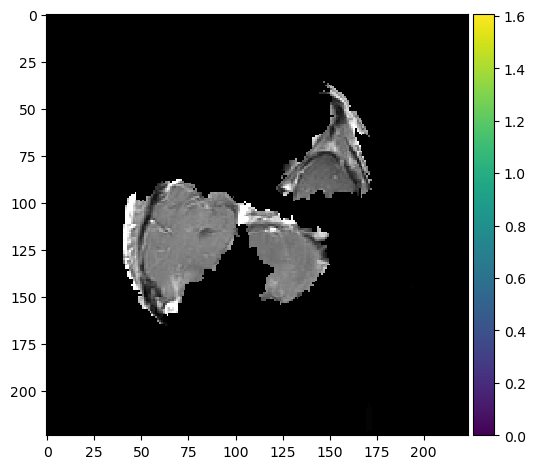

In [181]:
mask = np.zeros(num_superpixels)
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi_/0.5,mask,superpixels) )


In [110]:
def load_and_preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize image
    return img_array

In [114]:

def get_train_data(train_generator):
    x_train = []
    y_train = []
    for i in range(len(train_generator)):
        x, y = train_generator[i]
        x_train.extend(x)
        y_train.extend(y)
    return np.array(x_train), np.array(y_train)

train_generator = preprocessing_for_training()
validation_generator = preprocessing_for_testing_inference(32)

# Get train data from generator
x_train, y_train = get_train_data(train_generator)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [115]:
import numpy as np
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

In [147]:
import shap
explainer = shap.GradientExplainer(model, background)

In [151]:
explainer.__call__ = 1

In [173]:
Xi[:]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [166]:
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [174]:
#tf.keras.backend.set_learning_phase(0)

shap_values = explainer.shap_values(Xi[:].values)
shap.image_plot(shap_values, (Xi - 0.5) * 2 )
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [193]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = keyfile_path
os.environ['MLFLOW_GCS_BUCKET'] = 'ml-flow-remote-tracker-bucket'

mlflow.set_tracking_uri("http://35.231.231.140:5000/")
mlflow.set_experiment("Brain-Tumor-Classification")

<Experiment: artifact_location='gs://ml-flow-remote-tracker-bucket/1', creation_time=1717105063856, experiment_id='1', last_update_time=1717105063856, lifecycle_stage='active', name='Brain-Tumor-Classification', tags={}>

In [203]:
from mlflow import MlflowClient
client = MlflowClient()
model_metadata = client.get_latest_versions('Main', stages=["Staging"])
l = model_metadata[0]

/var/folders/7_/9w2s326d5cx3n3gsd9wtv04h0000gn/T/ipykernel_46332/3100417678.py:3: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/2.13.2/model-registry.html#migrating-from-stages
  model_metadata = client.get_latest_versions('Main', stages=["Staging"])


In [205]:
print(f'runs:/{l.run_id}/Brain_Tumor_Classification_Model')

runs:/33047b43cbe9447e94972cd460d768da/Brain_Tumor_Classification_Model
